In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.axes as ax
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import wrangle

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = wrangle.acquire_game_sales()

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33


In [4]:
df = wrangle.clean_game_sales(df)

In [5]:
df.head()

,Platform,Year,Genre,Publisher,Global_Sales,years_binned,level_of_success,Nintendo,Playstation,Xbox,...,Simulation,Sports,Misc,Role_Playing,Shooter,Strategy,Moderate_Success,Fairly_Successful,Very_Successful,Extremely_Successful
Rank,,,,,,,,,,,,,,,,,,,,,
1,Nintendo,2006,Sports,Nintendo,82.74,05-10,Extremely Successful,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,Nintendo,1985,Platform,Nintendo,40.24,80-85,Extremely Successful,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,Nintendo,2008,Simulation,Nintendo,35.82,05-10,Extremely Successful,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,Nintendo,2009,Sports,Nintendo,33.00,05-10,Extremely Successful,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,Nintendo,1996,Role_Playing,Nintendo,31.37,95-00's,Extremely Successful,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [6]:
train, validate, test = wrangle.split_game_sales(df)

In [7]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [8]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 1 to 16600
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Platform              16327 non-null  object  
 1   Year                  16327 non-null  int64   
 2   Genre                 16327 non-null  object  
 3   Publisher             16327 non-null  object  
 4   Global_Sales          16327 non-null  float64 
 5   years_binned          16318 non-null  category
 6   level_of_success      16327 non-null  category
 7   Nintendo              16327 non-null  uint8   
 8   Playstation           16327 non-null  uint8   
 9   Xbox                  16327 non-null  uint8   
 10  Computer              16327 non-null  uint8   
 11  Sega                  16327 non-null  uint8   
 12  Other                 16327 non-null  uint8   
 13  Action_Adventure      16327 non-null  uint8   
 14  Simulation            16327 non-null  uint8   
 15  Sports 

# Correlation Heatmap

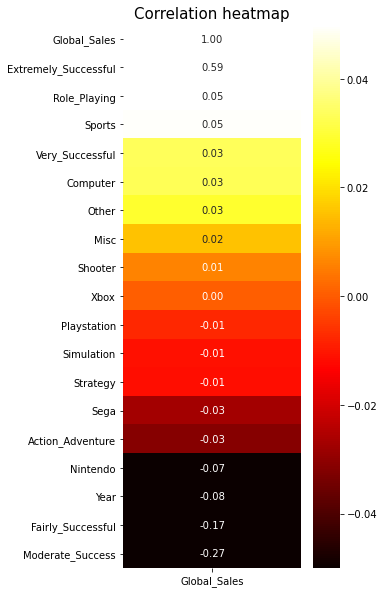

In [10]:
# Correlation heatmap
corr = pd.DataFrame(train.corr()['Global_Sales'].sort_values(ascending = False))
plt.figure(figsize = (4,10))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.05, 
            vmax = 0.05, cmap = 'hot')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

## Takeaways:
- There is not a lot of features that are directly correlated to the Global Sales of games
- Strongest are:
    - Year of realease with a correlation of -0.08
    - Nintendo Platform with a correlation of -0.07

# Visualize Distribution of Global Sales

<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='Global_Sales'>

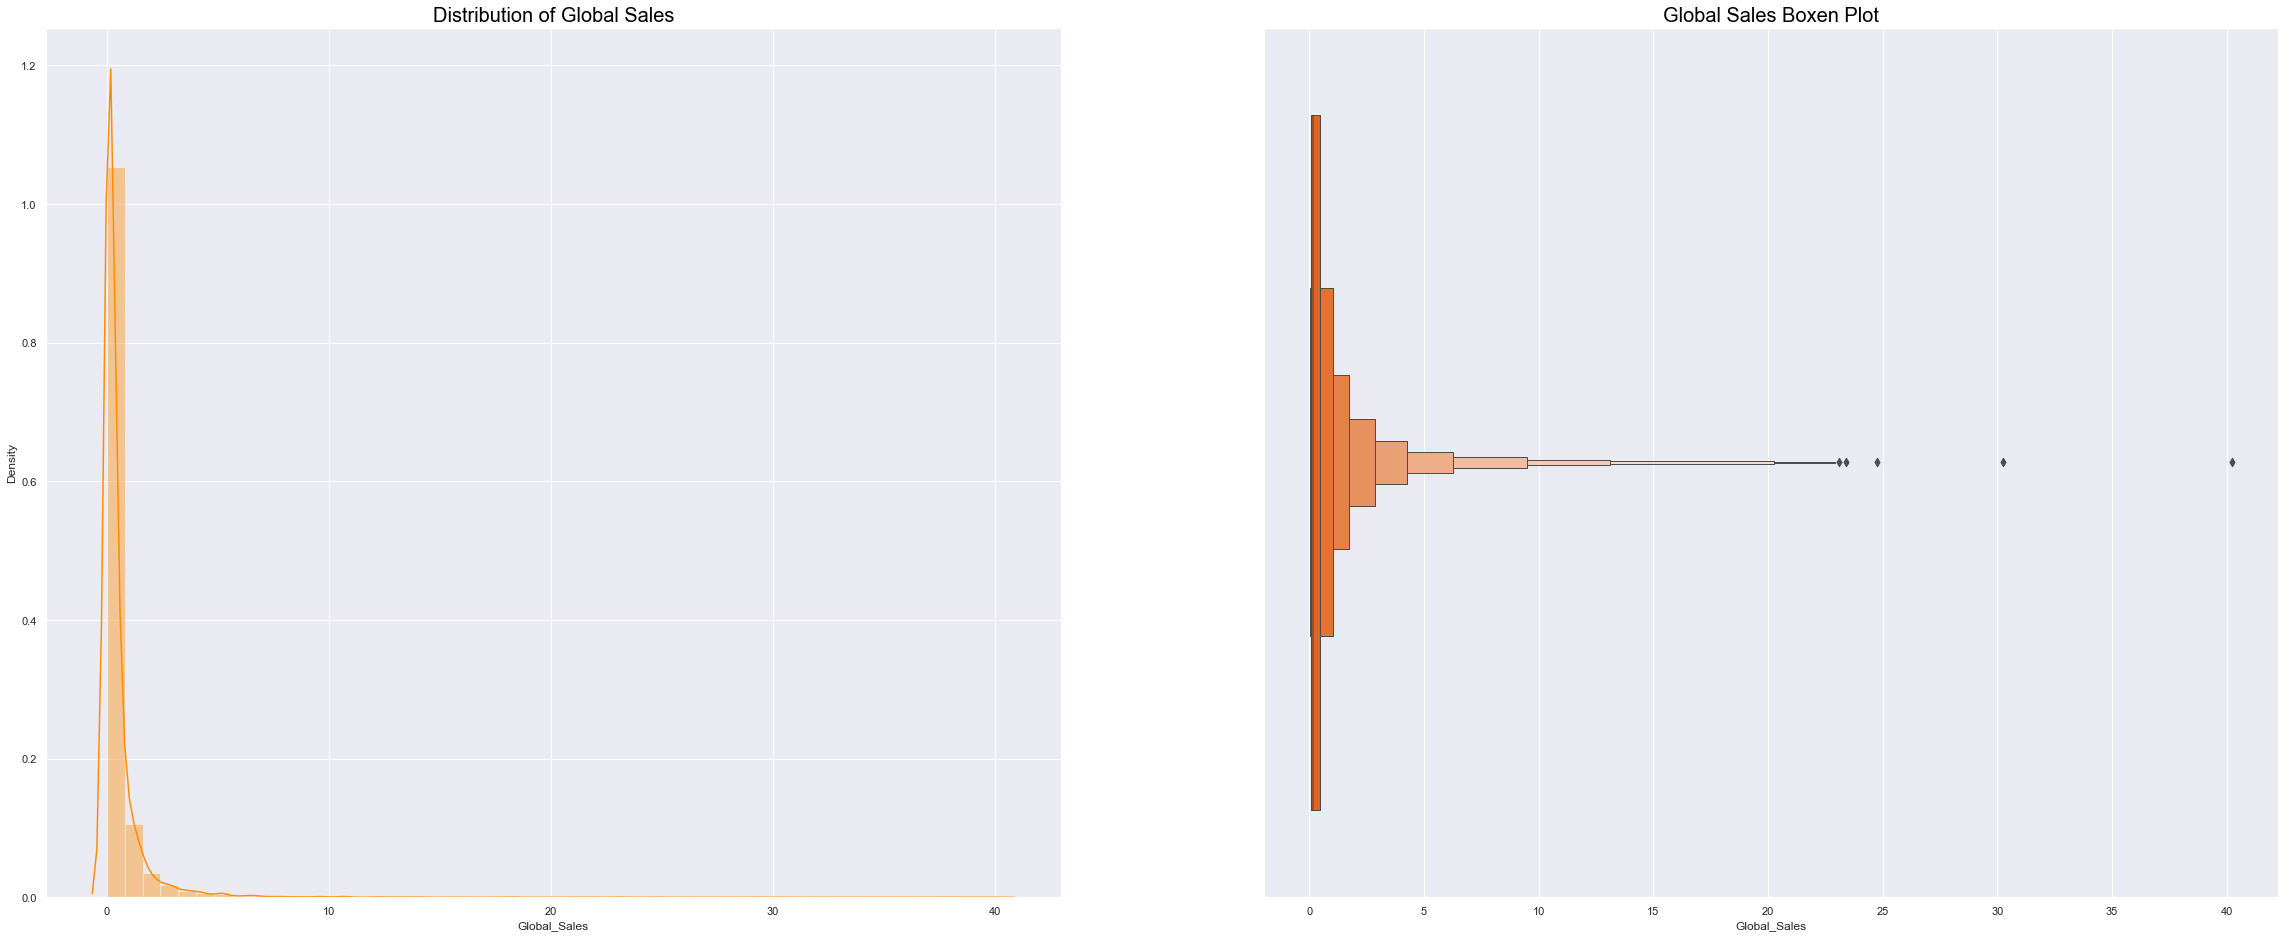

In [11]:
plt.subplots(1, 2, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,2,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.Global_Sales, kde=True, color='darkorange')

plt.subplot(1,2,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["Global_Sales"], palette='hot')

In [12]:
df.level_of_success.value_counts()

Fairly Successful       6360
Moderate Success        6072
Extremely Successful    2265
Very Successful         1630
Name: level_of_success, dtype: int64

## Takeaways:
- skewed right
- far more sales of 100K
    - nearly doubled in the amount of games titles than the second highest.

# Explore Years Binned

<AxesSubplot:xlabel='Year', ylabel='Density'>

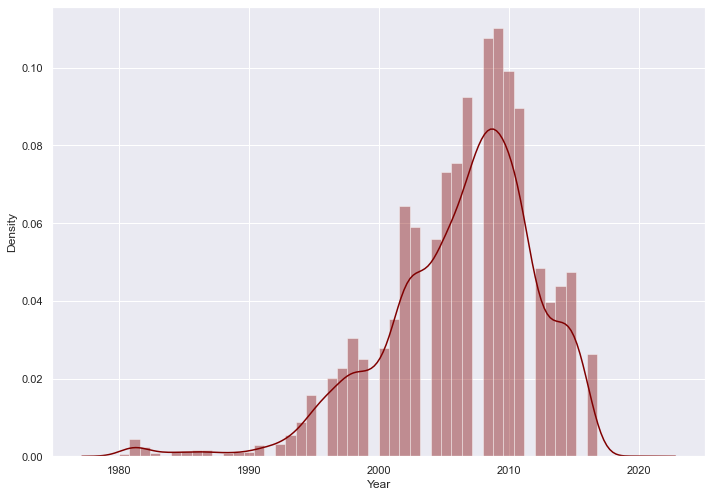

In [13]:
sns.distplot(train.Year, kde=True, color='maroon')

## Takeaways:
- There is a steady growth in the number of games made starting in the mid 90's.
- There is a drop off in number of games being made starting around 2008.

<AxesSubplot:title={'center':'Extremely Successful Games Through the Years'}, xlabel='years_binned', ylabel='Extremely_Successful'>

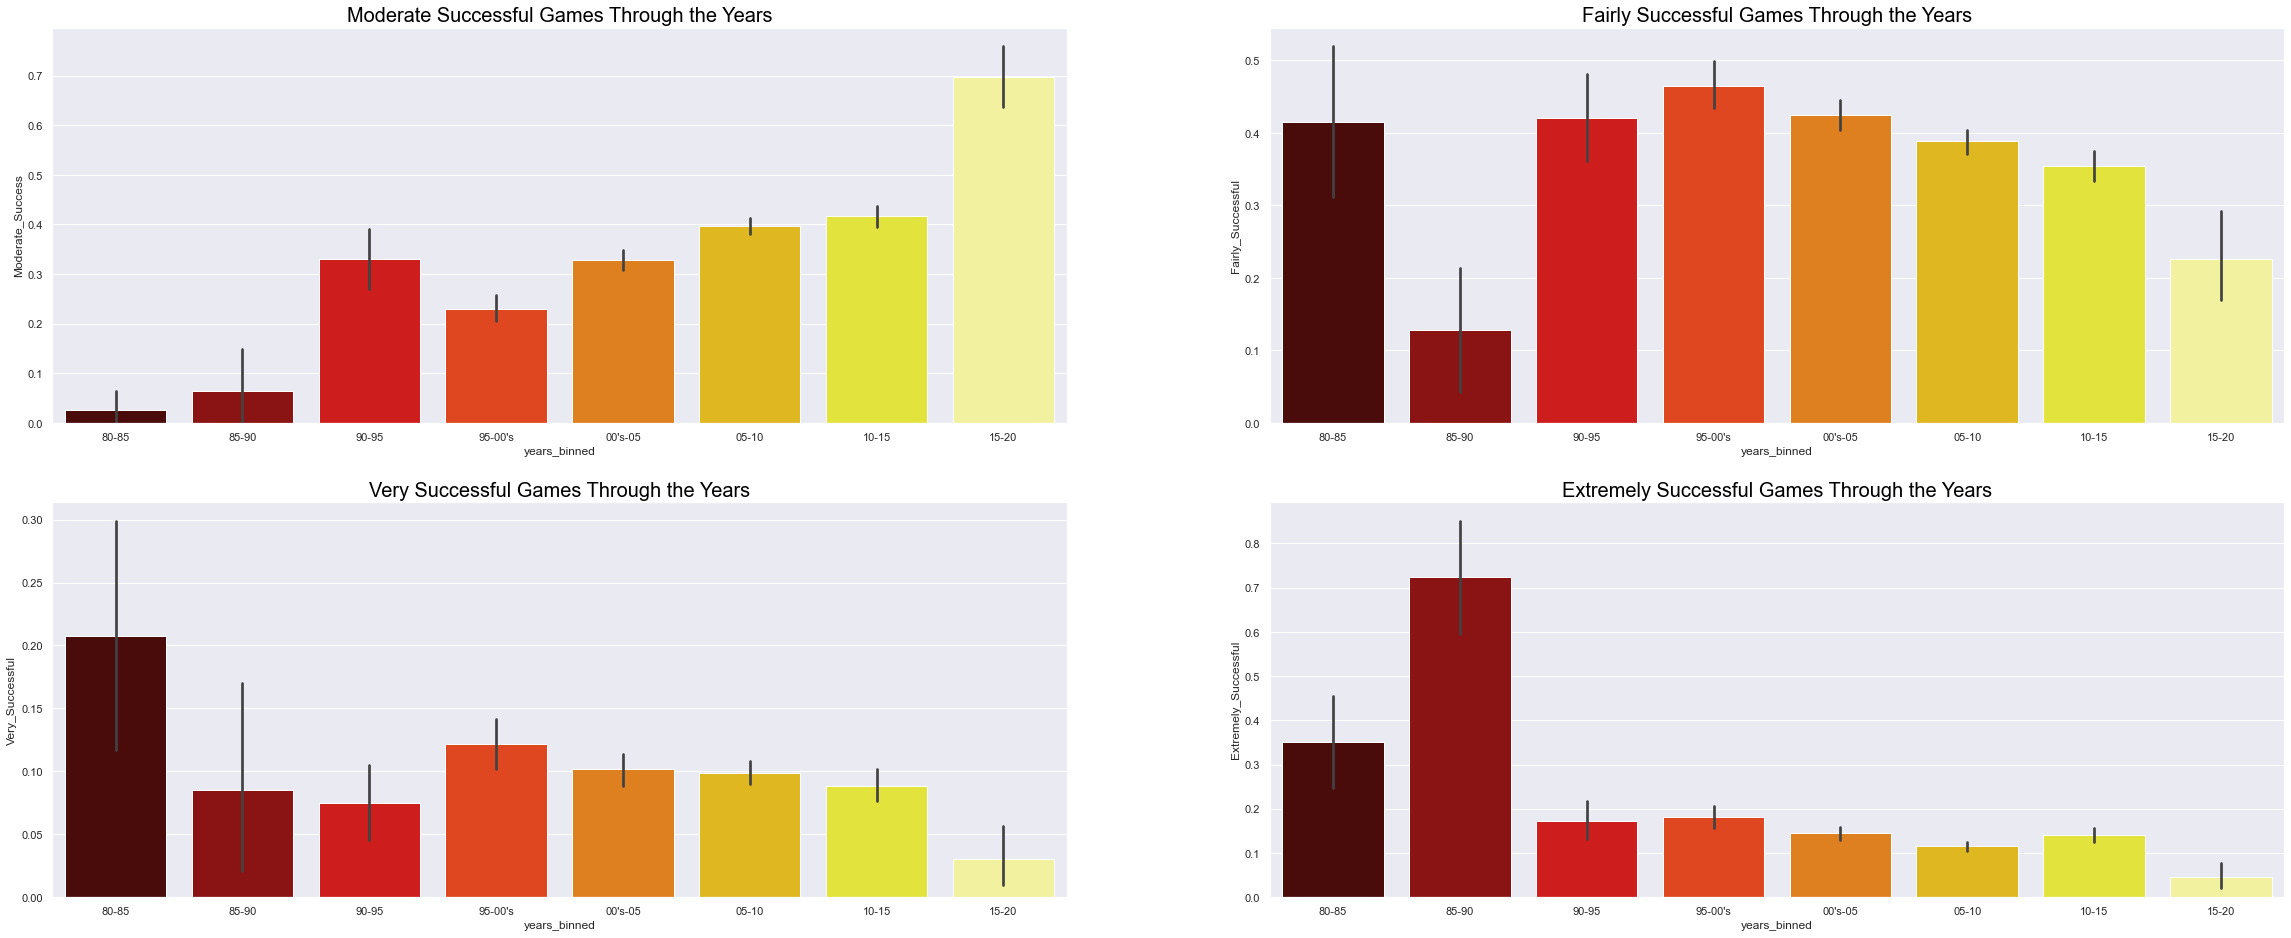

In [14]:
plt.subplots(2, 2, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
plt.title("Moderate Successful Games Through the Years", size=20, color='black')
sns.barplot(y='Moderate_Success', x ='years_binned', data = train, palette='hot')

plt.subplot(2,2,2)
plt.title("Fairly Successful Games Through the Years", size=20, color='black')
sns.barplot(y='Fairly_Successful', x ='years_binned', data = train, palette='hot')

plt.subplot(2,2,3)
plt.title("Very Successful Games Through the Years", size=20, color='black')
sns.barplot(y='Very_Successful', x ='years_binned', data = train, palette='hot')

plt.subplot(2,2,4)
plt.title("Extremely Successful Games Through the Years", size=20, color='black')
sns.barplot(y='Extremely_Successful', x ='years_binned', data = train, palette='hot')


## Takeaways:
- approximatly 72% of all extremely Successful Games were mae between 1985 and 1990.
    - the amount of Extremly successful games have continued to decrease are years passed.
- Moderate Successful games were at an all time lowbetween 1980 and 1985
    - but the amount of moderatly successful games grow more and more through the years
- in 1980 to 1985 made up 42% of all Fairly Successful games and 21% of all Very Successful games

|Year Range|Moderate Success|Fairly Successful|Very Successful|Extremely Successful|Total Individual Titles|
|-----|-------|------|-----|-------|-------|
|1980-1985|2 titles|32 titles|16 titles|27 titles|77 total titles|
|1985-1990 |3 titles|6 titles|4 titles|34 titles|47 total titles|
|1990-1995|88 titles|112 titles|20 titles|46 titles|266 total titles|
|1995-2000's |213 titles|431 titles|113 titles|169 titles|926 total titles|
|2000's-2005|691 titles|896 titles|215 titles|305 titles|2,107 total titles|
|2005-2010|1411 titles|1379 titles|351 titles|408 titles|3,549 total titles|
|2010-2015|820 titles|698 titles|174 titles|278 titles|1,970 total titles|
|2015-2020|136 titles|44 titles|0 titles|9 titles|189 total titles|

## Takeaways:
- 3,549 games were made between 2005 and 2010
    - with 39.7% being of Moderate Success
    - and 38.8% being Fairly succcessful
- 72% of all the games made in 1985 were extremely successful

___

# Visualize Percents of the Sales Bins per Platforms

<AxesSubplot:title={'center':'Percent of Sales for All Other Platforms'}, xlabel='level_of_success', ylabel='Other'>

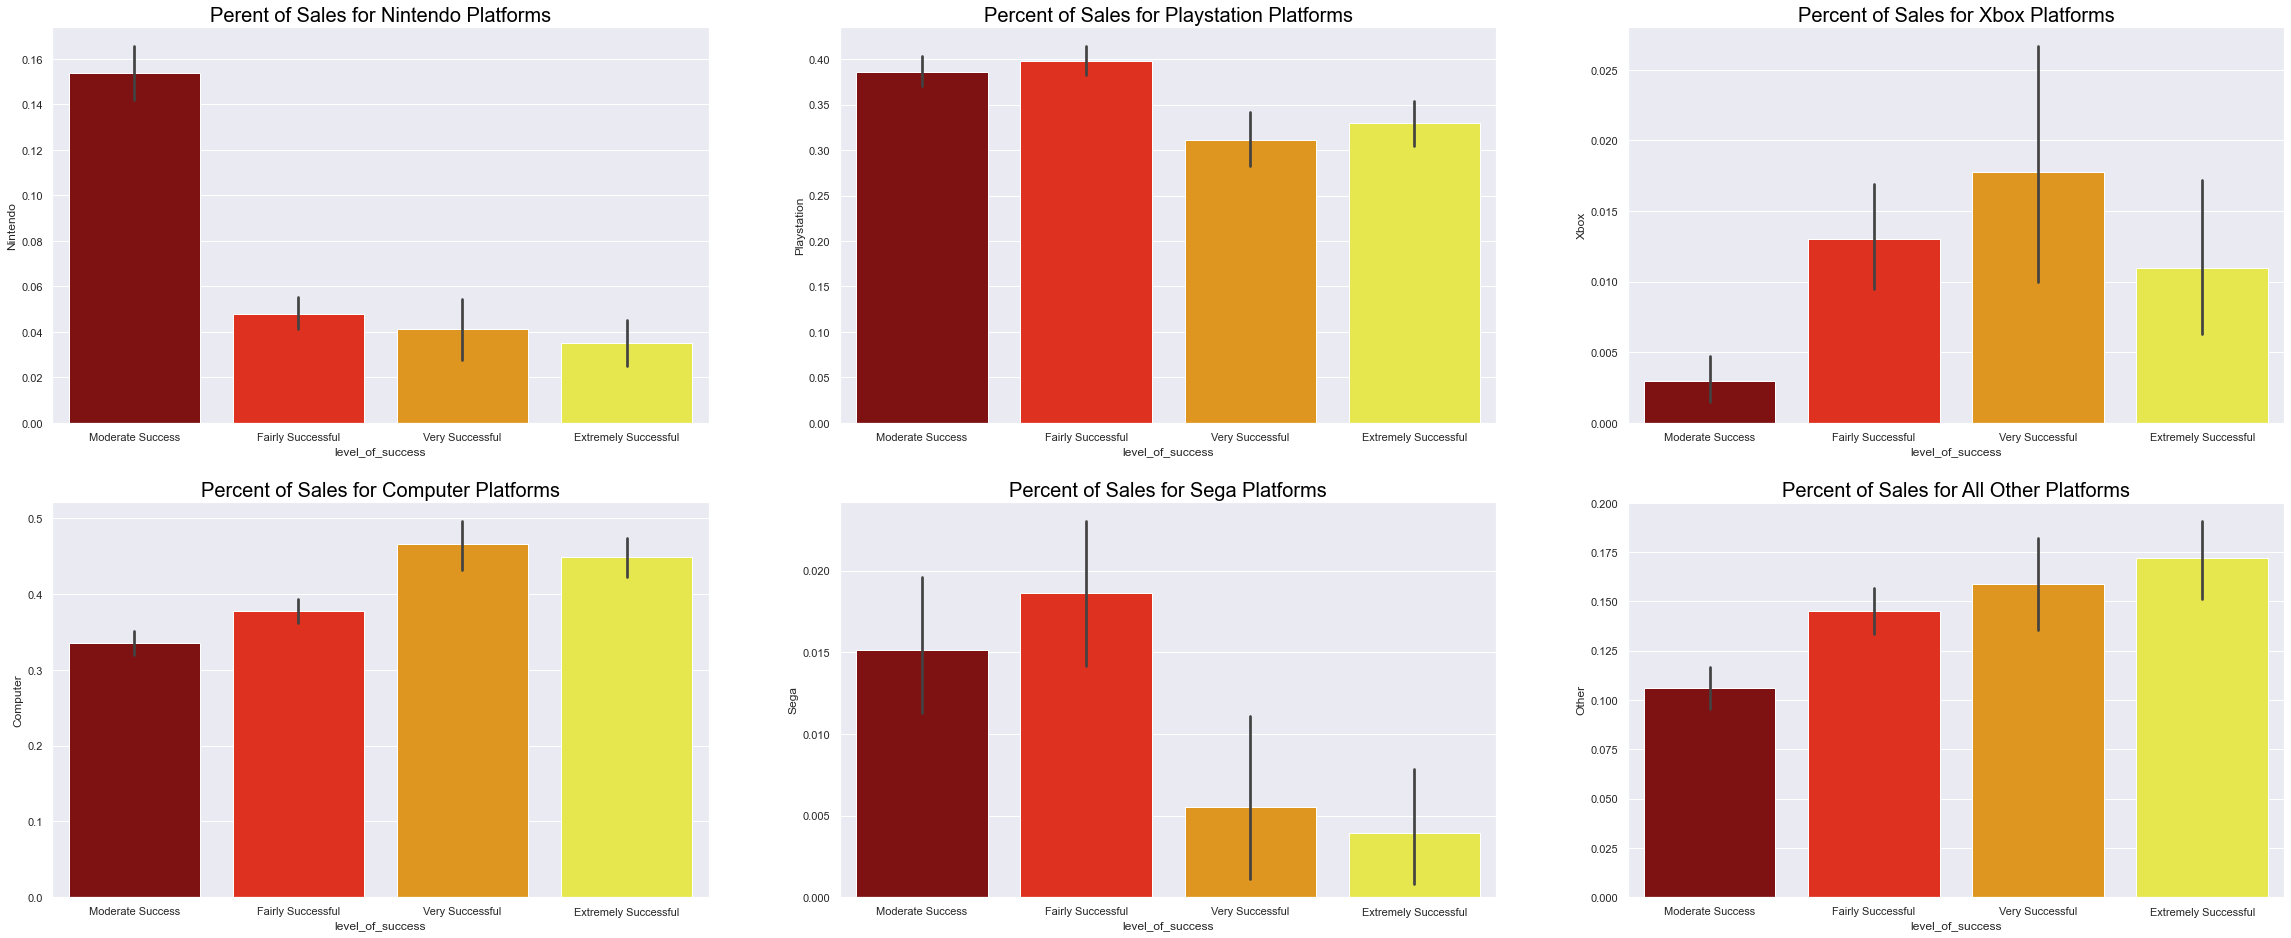

In [15]:
plt.subplots(2, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,3,1)
plt.title("Perent of Sales for Nintendo Platforms", size=20, color='black')
sns.barplot(y='Nintendo', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,3,2)
plt.title("Percent of Sales for Playstation Platforms", size=20, color='black')
sns.barplot(y='Playstation', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,3,3)
plt.title("Percent of Sales for Xbox Platforms", size=20, color='black')
sns.barplot(y='Xbox', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,3,4)
plt.title("Percent of Sales for Computer Platforms", size=20, color='black')
sns.barplot(y='Computer', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,3,5)
plt.title("Percent of Sales for Sega Platforms", size=20, color='black')
sns.barplot(y='Sega', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,3,6)
plt.title("Percent of Sales for All Other Platforms", size=20, color='black')
sns.barplot(y='Other', x='level_of_success', data=train,
               palette='hot')

## Takeaways:
- These are showing the percentage of Sales across each platform type.
- Nintendo usually has moderate success with their games
    - About 15.8% of Moderate Success comes from Nintendo games.
- Playstation's has a fairly goo distribution of success. 
    - Their moderate succes makes up abotu 39% of all moderate successful games
    - Their Fairly successful games make up about 40% of all fairly successful games. 
    - And the very success makes up for about 33% of all Very successful games.
    - Finaly their extremely successful games make up for about 32% of all extremely successful games
- Xbox Platforms have a pretty steady amount of copies sold ranging evenly between 200 and 800 thousand copies sold.
    - Xbox tends to put out more Very Successful games thatn any other sucess rate.
        - Makes up for about 2% of all Very Successful games
            - This is not very much compared to the others but is their highest output in success level.
- Computer Platforms have a pretty steady amount of copies sold in all amounts.
    - Their moderate succes makes up abotu 32% of all moderate successful games
    - Their Fairly successful games make up about 34% of all fairly successful games. 
    - And the very success makes up for about 42% of all Very successful games.
    - Finaly their extremely successful games make up for about 43% of all extremely successful games
- Sega platforms skew more towards lower success than higheer successful games
    - Their highest performing is between are fairly sucessful games.
        - Makes up about 2% of all fairly successful games.
            - This is not very much compared to the others but is their highest output in success level.
- all other platfroms perform very evenly thorugh all success rates
    - Their moderate succes makes up abotu 10.1% of all moderate successful games
    - Their Fairly successful games make up about 13.8% of all fairly successful games. 
    - And the very success makes up for about 15.7% of all Very successful games.
    - Finaly their extremely successful games make up for about 17.4% of all extremely successful games

___

# Visualize Number Of Game Titles in each Sales Bin

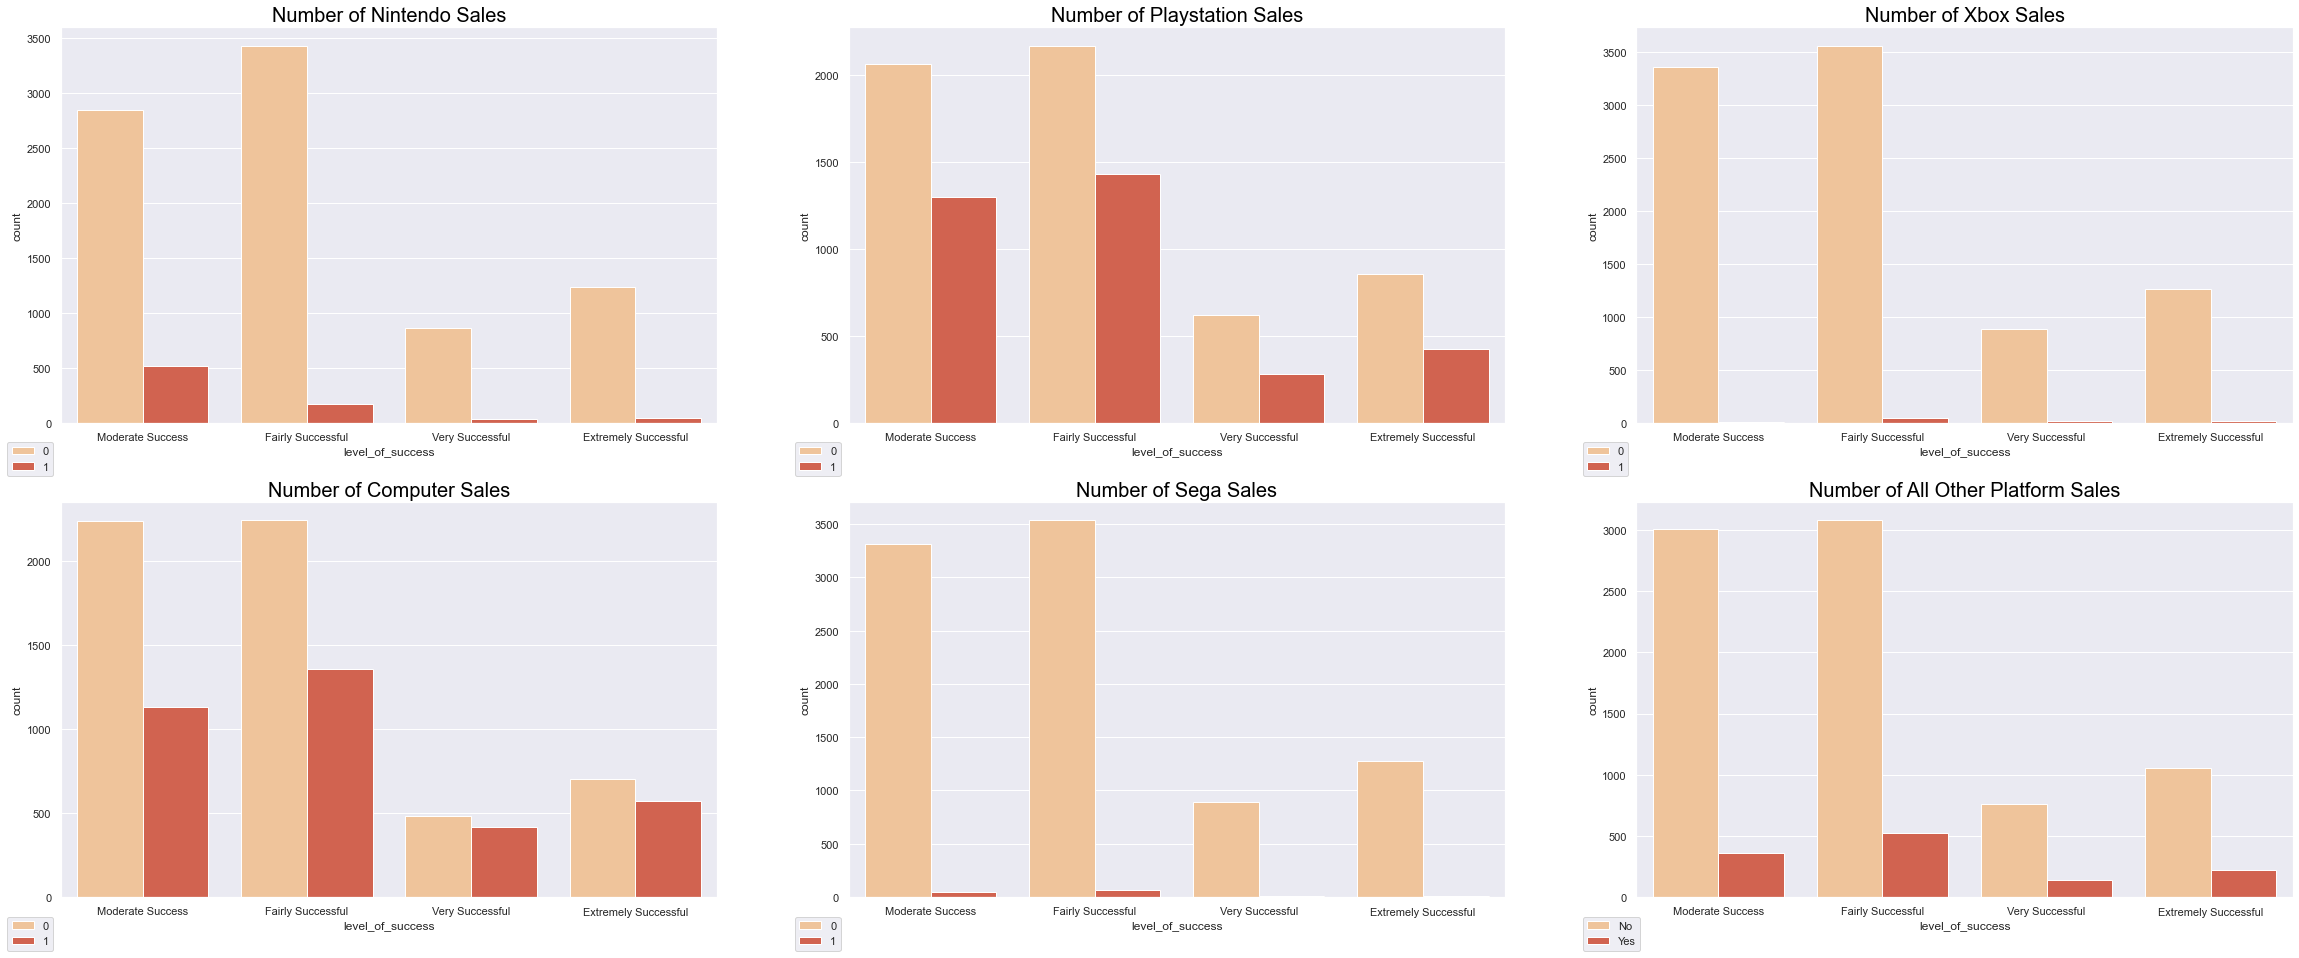

In [16]:
plt.subplots(2, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,3,1)
plt.title("Number of Nintendo Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Nintendo', data=train,
               palette='OrRd')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,2)
plt.title("Number of Playstation Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Playstation', data=train,
               palette='OrRd')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,3)
plt.title("Number of Xbox Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Xbox', data=train,
               palette='OrRd')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,4)
plt.title("Number of Computer Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Computer', data=train,
               palette='OrRd')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,5)
plt.title("Number of Sega Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Sega', data=train,
               palette='OrRd')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,6)
plt.title("Number of All Other Platform Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Other', data=train,
               palette='OrRd')


leg = plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')
labs = leg.texts
labs[0].set_text("No")
labs[1].set_text("Yes")


## Takeaways:
- Nintendo puts out more games of moderate success
- Playstation pits out an even amount of moderate and fairly successful games
- Xbox games usually range between Fairly successful and Verybsuccessful
- Computer games are pretty even distributed accross all 4 success levels
- Sega games tend to be of Moderate or Fair success
- All other game platforms are usually of moderate success or fairly successful

|Platform|Moderate Success|Fairly Successful|Very Successful|Extremely Successful|Total Individual Titles|
|-----|-------|------|-----|-------|-------|
|Nintendo|517 titles|173 titles|45 titles|37 titles|772 total titles|
|Playstation|1,432 titles|1,300 titles|421 titles|280 titles|3,433 total titles|
|Xbox|47 titles|16 titles|14 titles|10 titles|87 total titles|
|Computer|1,359 titles|1,129 titles|573 titles|419 titles|3,480 total titles|
|Sega|67 titles|51 titles|5 titles|5 titles|128 total titles|
|Other|522 titles|357 titles|220 titles|143 titles|1,242 total titles|

___

# Visualize Percents of the Sales Bins per Genre

<AxesSubplot:title={'center':'Percent of Sales for All Other Game Types'}, xlabel='level_of_success', ylabel='Misc'>

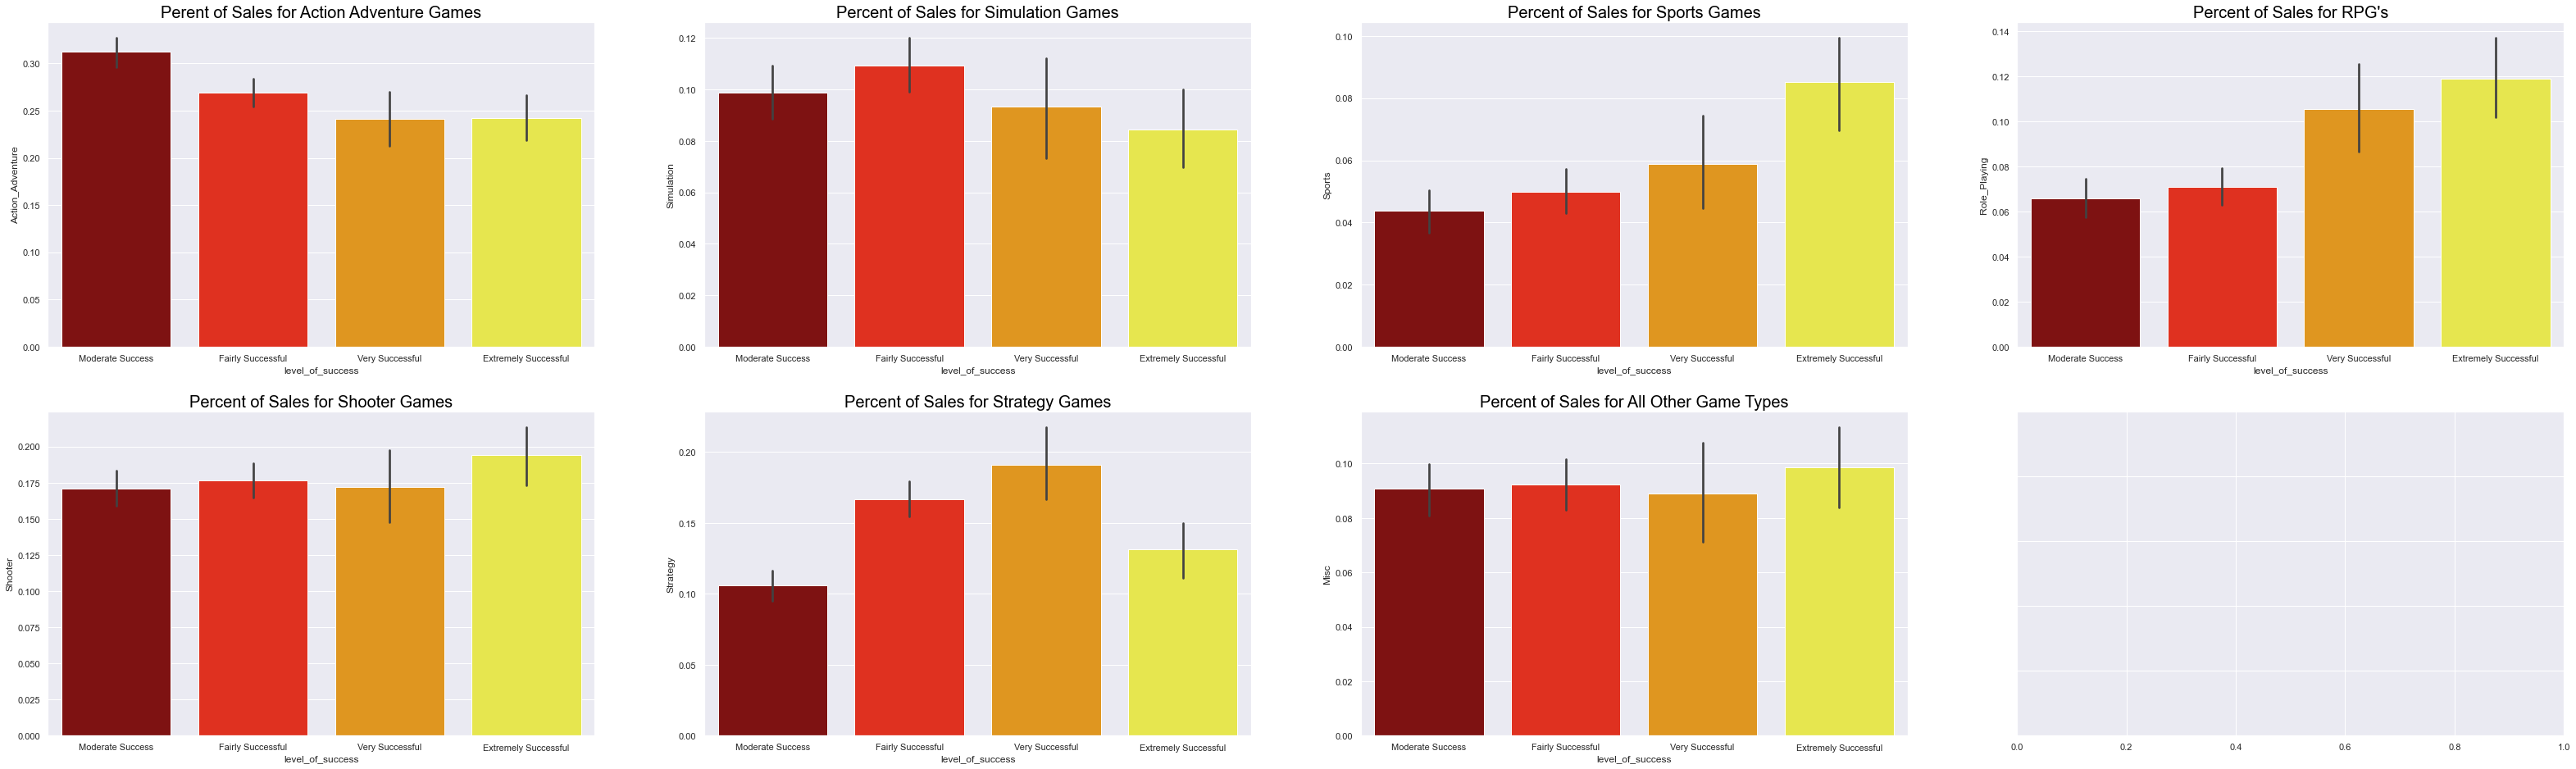

In [17]:
plt.subplots(2, 4, figsize=(55,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,4,1)
plt.title("Perent of Sales for Action Adventure Games", size=20, color='black')
sns.barplot(y='Action_Adventure', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,4,2)
plt.title("Percent of Sales for Simulation Games", size=20, color='black')
sns.barplot(y='Simulation', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,4,3)
plt.title("Percent of Sales for Sports Games", size=20, color='black')
sns.barplot(y='Sports', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,4,4)
plt.title("Percent of Sales for RPG's", size=20, color='black')
sns.barplot(y='Role_Playing', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,4,5)
plt.title("Percent of Sales for Shooter Games", size=20, color='black')
sns.barplot(y='Shooter', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,4,6)
plt.title("Percent of Sales for Strategy Games", size=20, color='black')
sns.barplot(y='Strategy', x='level_of_success', data=train,
               palette='hot')

plt.subplot(2,4,7)
plt.title("Percent of Sales for All Other Game Types", size=20, color='black')
sns.barplot(y='Misc', x='level_of_success', data=train,
               palette='hot')

## Takeaways:
- Action Adventure Games have the highest percentage of game success across all success levels
    - Ranging from ~24% to ~32%
- Sport games and RPG's both tend to be on the low end of success percents, but both have a spike when selling over 10 million copies.
- The Biggest sellers when it comes to genre are Action Adventure, Strategy, and Shooters.

___

# Visualize Number Of Game Genre's in each Sales Bin

<AxesSubplot:title={'center':'Number of All Other Genre Sales'}, xlabel='level_of_success', ylabel='count'>

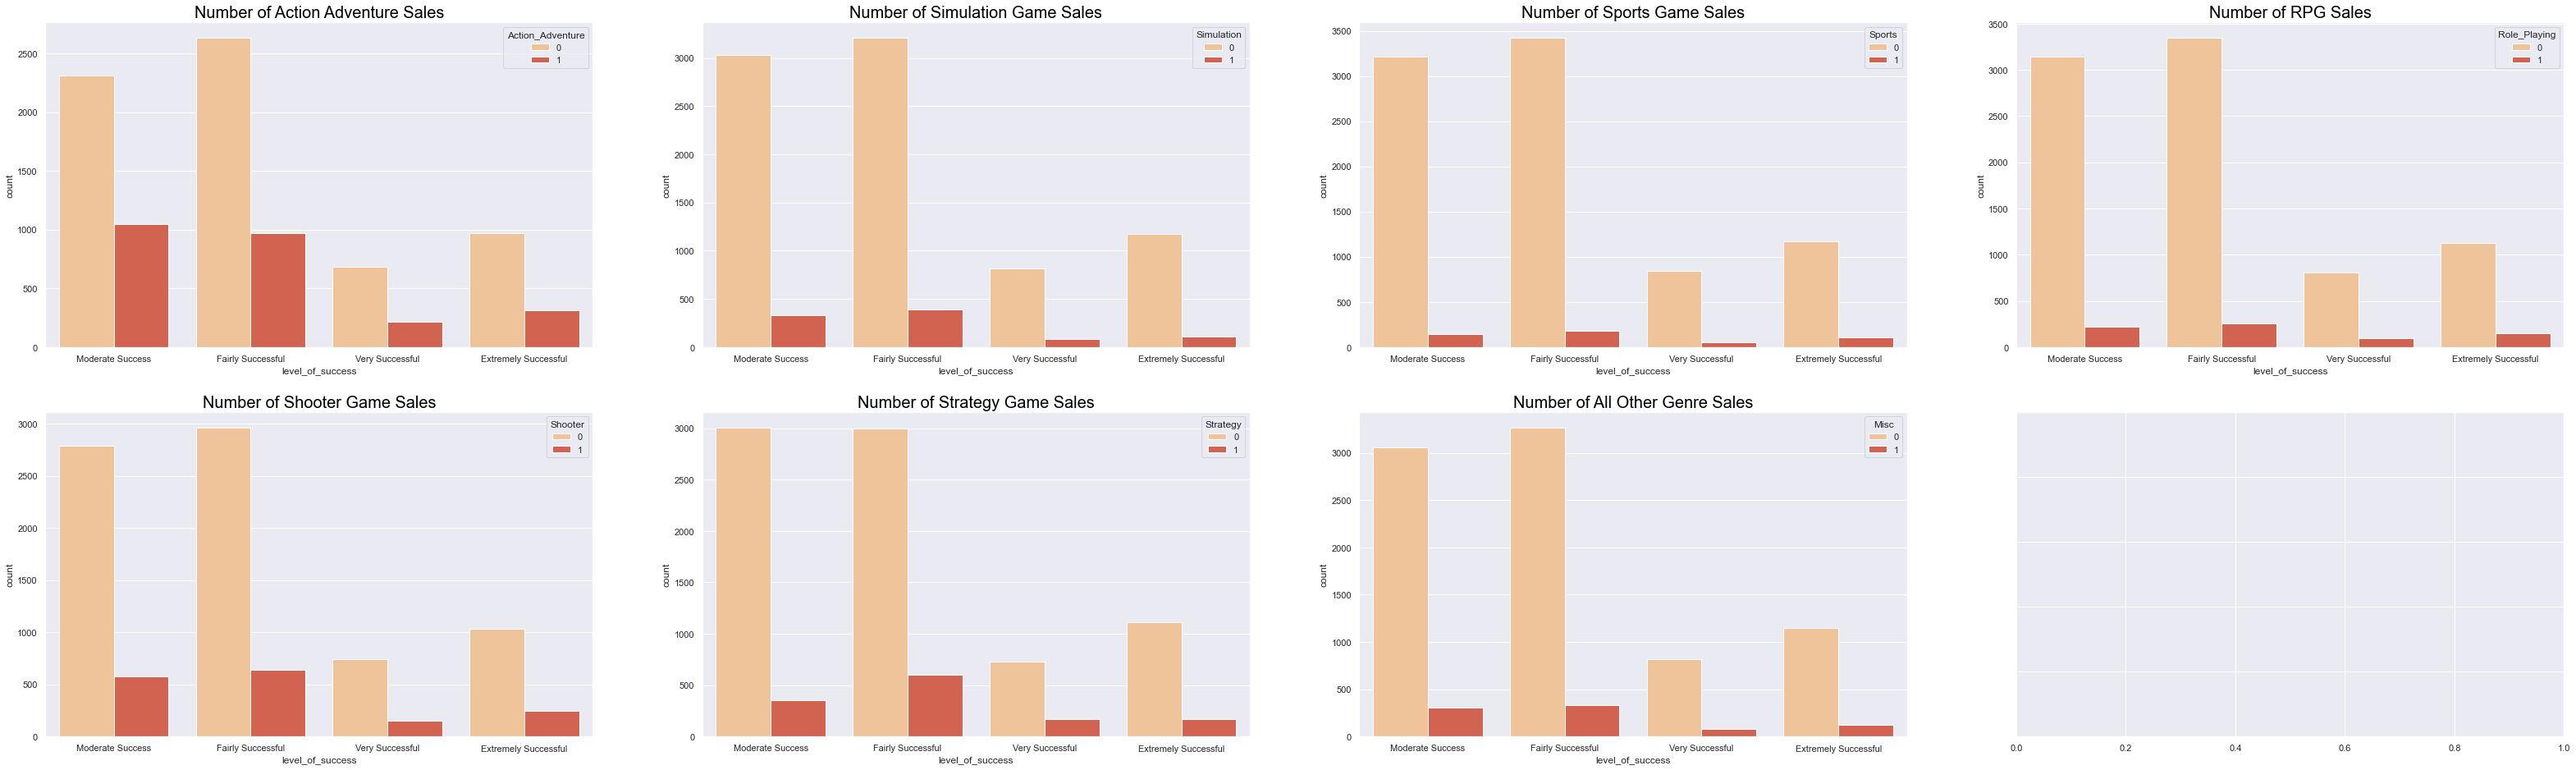

In [18]:
plt.subplots(2, 4, figsize=(55,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,4,1)
plt.title("Number of Action Adventure Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Action_Adventure', data=train,
               palette='OrRd')

plt.subplot(2,4,2)
plt.title("Number of Simulation Game Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Simulation', data=train,
               palette='OrRd')

plt.subplot(2,4,3)
plt.title("Number of Sports Game Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Sports', data=train,
               palette='OrRd')

plt.subplot(2,4,4)
plt.title("Number of RPG Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Role_Playing', data=train,
               palette='OrRd')

plt.subplot(2,4,5)
plt.title("Number of Shooter Game Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Shooter', data=train,
               palette='OrRd')

plt.subplot(2,4,6)
plt.title("Number of Strategy Game Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Strategy', data=train,
               palette='OrRd')

plt.subplot(2,4,7)
plt.title("Number of All Other Genre Sales", size=20, color='black')
sns.countplot(x='level_of_success', hue='Misc', data=train,
               palette='OrRd')

## Takeaways:
- There are far many Action Adventure games made than any other.
    - Total of 2,545 individual titles.
- Strategy is the second highest with 2,304 games which is 19.27% of games.
- The lowest produced game type that sold a minimum of 100 thousand copies is Sports with only 876 game titles.

|Platfrom|Moderate Success|Fairly Successful|Very Successful|Extremely Successful|Total Number of Titles|
|-----|-------|------|-----|-------|-------|
|Action Adventure|1,050 titles|968 titles|217 titles|310 titles|2,545 titles total|
|Simulation|332 titles|393 titles|84 titles|108 titles|917 titles total|
|Sports|179 titles|147 titles|53 titles|109 titles|488 titles total|
|RPG|221 titles|255 titles|95 titles|152 titles|723 titles total|
|Shooter|575 titles|636 titles|155 titles|248 titles|1,614 titles total|
|Strategy|357 titles|600 titles|172 titles|168 titles|1,297titles total|
|Misc|305 titles|332 titles|80 titles|126 titles|843 titles total

___

# Statistical Tests

## Test Genre

In [19]:
# normlaize makes it percentage
observe = pd.crosstab(train.Genre, train.level_of_success, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "A games genre and its level of success are independent from each other"
alt_hypothesis = "The genre of a game and its success are dependent on one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)


We reject the null hypothesis
We reject the hypothesis that: 
 A games genre and its level of success are independent from each other
 
The alpha is: 
 0.05
 
P Value is: 
 0.02294252887716387


___

## Test Publisher

In [20]:
# normlaize makes it percentage
observe = pd.crosstab(train.Publisher, train.level_of_success, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "A games genre and its level of success are independent from each other"
alt_hypothesis = "The genre of a game and its success are dependent on one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)

We fail to reject the null hypothesis
There is not enough evidence to move forward with the alternative hypothesis
P Value is: 
 1.0
 
P Value is: 
 0.05


___

## Testing Binned Years

In [21]:
# normlaize makes it percentage
observe = pd.crosstab(train.years_binned, train.level_of_success, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "A games genre and its level of success are independent from each other"
alt_hypothesis = "The genre of a game and its success are dependent on one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)

We reject the null hypothesis
We reject the hypothesis that: 
 A games genre and its level of success are independent from each other
 
The alpha is: 
 0.05
 
P Value is: 
 6.712021410509012e-123


___

## Test Platform

In [22]:
# normlaize makes it percentage
observe = pd.crosstab(train.Platform, train.level_of_success, margins = True)
chi2, p, degf, expected = stats.chi2_contingency(observe)
# Chi test is for catigorical vs catigorical
null_hypothesis = "A games genre and its level of success are independent from each other"
alt_hypothesis = "The genre of a game and its success are dependent on one another."
alpha = .05 #my confident if 0.95 therfore my alpha is .05

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that: \n", null_hypothesis)
    print(' ')
    print(f'The alpha is: \n', alpha)
    print(' ')
    print(f'P Value is: \n', p)
else:
    print("We fail to reject the null hypothesis")
    print("There is not enough evidence to move forward with the alternative hypothesis")
    print(f'P Value is: \n', p)
    print(' ')
    print(f'P Value is: \n', alpha)

We reject the null hypothesis
We reject the hypothesis that: 
 A games genre and its level of success are independent from each other
 
The alpha is: 
 0.05
 
P Value is: 
 7.614105483906174e-144
